Note download data from https://drive.google.com/drive/folders/1EgDN57LDuvlZAwr5-eHWB5CTJ7K9HpDP

Credit to this repo: https://github.com/LukasMosser/geolink_dataset

## Data Disclaimer

All the data serving as an input to these notebooks was generously donated by GEOLINK  
and is CC-by-SA 4.0 

If you use their data please reference their dataset properly to give them credit for their contribution.

In [219]:
import lasio
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm.auto import tqdm
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path
from sklearn import preprocessing
from operator import itemgetter

# in and our directories

In [29]:

data_locations = Path("../../data/raw/geolink_dataset/GEOLINK North sea wells with Lithology interpretation/GEOLINK_Lithology and wells NORTH SEA")
data_locations_wellheads = Path("../../data/raw/geolink_dataset/norge_well_heads")
interim_locations = Path("../../data/processed/geolink_norge_dataset/")

# load and save as parquet

In [ ]:
df_lithology = pd.read_excel(data_locations/'../Lithology code data.xlsx', header=1)[:-1]
df_lithology['Abbreviation'] = pd.to_numeric(df_lithology['Abbreviation'])
df_lithology.to_parquet(interim_locations/'geolink_norge_lithology.parquet', compression='gzip')
df_lithology

In [327]:
df_well_tops = pd.concat([
    pd.read_csv(data_locations_wellheads/'wellbore_exploration_all.csv'),
    pd.read_csv(data_locations_wellheads/'wellbore_development_all.csv'),
    pd.read_csv(data_locations_wellheads/'wellbore_other_all.csv'),
])
df_well_tops['wlbWellboreName_geolink'] = df_well_tops['wlbWellboreName'].str.replace('/', '_')


# add dates
date_cols = ['wlbEntryDate', 'wlbCompletionDate']
for c in date_cols:
    df_well_tops[c] = pd.to_datetime(df_well_tops[c])#.astype('str')

df_well_tops['wlbNsDecDeg'] = df_well_tops['wlbNsDecDeg'].replace(0, np.nan)
df_well_tops['wlbEwDesDeg'] = df_well_tops['wlbEwDesDeg'].replace(0, np.nan)
    
a=set(df_well_tops.columns)
df_well_tops = df_well_tops.dropna(axis=1, thresh=0.9*len(df_well_tops))
b=set(df_well_tops.columns)
print('removed', a-b)
    
# make into geodataframe
df_well_tops = gpd.GeoDataFrame(df_well_tops, geometry=gpd.points_from_xy(df_well_tops.wlbEwDesDeg, df_well_tops.wlbNsDecDeg))
df_well_tops

removed {'wlbAgeWithHc3', 'wlbReentry', 'wlbFormationWithHc3', 'wlbBottomHoleTemperature', 'wlbMultilateral', 'wlbEntryPreDrillDate', 'wlbFormationWithHc1', 'wlbSiteSurvey', 'wlbProductionFacility', 'fldNpdidField', 'wlbKickOffPoint', 'wlbDiscoveryWellbore', 'wlbReclassFromWellbore', 'wlbNpdidSiteSurvey', 'dscNpdidDiscovery', 'wlbContentPlanned', 'wlbReleasedDate', 'wlbDiskosWellboreParent', 'prlNpdidProdLicenceTarget', 'wlbDrillingFacilityFixedOrMoveable', 'fclNpdidFacilityProducing', 'wlbNpdidWellboreReclass', 'wlbDiscovery', 'prlNpdidProductionLicence', 'wlbLicenceTargetName', 'wlbPluggedAbandonDate', 'wlbFactMapUrl', 'wlbDiskosWellboreType', 'wlbAgeWithHc1', 'wlbFormationWithHc2', 'wlbAgeAtTd', 'wlbField', 'wlbDrillingDays', 'wlbDateReclass', 'wlbPurposePlanned', 'wlbFormationAtTd', 'wlbSeismicLocation', 'wlbNamePart6', 'wlbPressReleaseUrl', 'wlbMaxInclation', 'wlbSubSea', 'wlbFinalVerticalDepth', 'wlbWdssQcDate', 'wlbContent', 'wlbPluggedDate', 'wlbDateUpdatedMax', 'wlbAgeWithHc2'

,wlbWellboreName,wlbWell,wlbDrillingOperator,wlbProductionLicence,wlbPurpose,wlbWellType,wlbEntryDate,wlbCompletionDate,wlbDrillPermit,wlbKellyBushElevation,...,wlbNamePart1,wlbNamePart2,wlbNamePart3,wlbNamePart4,wlbFactPageUrl,wlbNpdidWellbore,wlbDateUpdated,datesyncNPD,wlbWellboreName_geolink,geometry
0,1/2-1,1/2-1,Phillips Petroleum Norsk AS,143,WILDCAT,EXPLORATION,1989-03-20,1989-04-06,604-L,22.0,...,1,2,,1,https://factpages.npd.no/factpages/default.asp...,1382,03.10.2019,03.07.2020,1_2-1,POINT (2.47658 56.88752)
1,1/2-2,1/2-2,Paladin Resources Norge AS,143 CS,WILDCAT,EXPLORATION,2005-12-14,2006-02-02,1103-L,40.0,...,1,2,,2,https://factpages.npd.no/factpages/default.asp...,5192,03.10.2019,03.07.2020,1_2-2,POINT (2.49657 56.99222)
2,1/3-1,1/3-1,A/S Norske Shell,011,WILDCAT,EXPLORATION,1968-06-07,1968-11-11,15-L,26.0,...,1,3,,1,https://factpages.npd.no/factpages/default.asp...,154,03.10.2019,03.07.2020,1_3-1,POINT (2.85139 56.85583)
3,1/3-2,1/3-2,A/S Norske Shell,011,WILDCAT,EXPLORATION,1969-05-14,1969-07-27,26-L,26.0,...,1,3,,2,https://factpages.npd.no/factpages/default.asp...,165,03.10.2019,03.07.2020,1_3-2,POINT (2.75000 56.93611)
4,1/3-3,1/3-3,Elf Petroleum Norge AS,065,WILDCAT,EXPLORATION,1982-08-22,1983-03-24,343-L,25.0,...,1,3,,3,https://factpages.npd.no/factpages/default.asp...,87,06.03.2020,03.07.2020,1_3-3,POINT (2.98168 56.95238)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,8006/8-U-4,8006/8-U-4,OCEAN DRILLING PROGRAM TEXAS A & M UNIVERSITY,NaN,SCIENTIFIC,OTHER,1993-08-29,1993-08-30,320-GJ,0.0,...,8006,8,U,4,https://factpages.npd.no/factpages/default.asp...,2234,03.10.2019,03.07.2020,8006_8-U-4,POINT (6.59040 80.26470)
1115,8008/7-U-1,8008/7-U-1,OCEAN DRILLING PROGRAM TEXAS A & M UNIVERSITY,NaN,SCIENTIFIC,OTHER,1993-08-22,1993-08-24,320-GK,0.0,...,8008,7,U,1,https://factpages.npd.no/factpages/default.asp...,2235,03.10.2019,03.07.2020,8008_7-U-1,POINT (8.22730 80.47440)
1116,8008/7-U-2,8008/7-U-2,OCEAN DRILLING PROGRAM TEXAS A & M UNIVERSITY,NaN,SCIENTIFIC,OTHER,1993-08-22,1993-08-24,320-GL,0.0,...,8008,7,U,2,https://factpages.npd.no/factpages/default.asp...,2236,03.10.2019,03.07.2020,8008_7-U-2,POINT (8.22730 80.47460)
1117,8008/7-U-3,8008/7-U-3,OCEAN DRILLING PROGRAM TEXAS A & M UNIVERSITY,NaN,SCIENTIFIC,OTHER,1993-08-22,1993-08-24,320-GM,0.0,...,8008,7,U,3,https://factpages.npd.no/factpages/default.asp...,2237,03.10.2019,03.07.2020,8008_7-U-3,POINT (8.22730 80.47480)


## Las files

We can now proceed to import these files as las files and get their dataframes and hopefully put them into a data format that is more suited for ML tasks.

In [36]:
if not (interim_locations/'geolink_norge_well_logs_raw.parquet').exists():
    
    # load las files
    well_dataframes = []
    files = sorted(data_locations.glob('*.las'))
    for f in tqdm(files):
        df = lasio.read(f).df()
        df['Well'] = f.stem
        well_dataframes.append(df)
        
    df_all = pd.concat(well_dataframes)

    df_all['Well'] = df_all['Well'].astype('category')

    # Name lithology
    litho_dict = df_lithology.set_index('Abbreviation')['Lithology'].to_dict()
    df_all['LITHOLOGY_GEOLINK'] = df_all['LITHOLOGY_GEOLINK'].replace(litho_dict).astype('category')

    # unique index
    df_all = df_all.reset_index()#.set_index(['Well', 'DEPT'])

    df_all.to_parquet(interim_locations/'geolink_norge_well_logs_raw.parquet', compression='gzip')
    
df_all = pd.read_parquet(interim_locations/'geolink_norge_well_logs_raw.parquet')

## Clean las files

In [329]:
# Clean. 

# must have well head
df_all_clean2 = df_all[df_all.Well.apply(lambda s:s in set(df_well_tops['wlbWellboreName_geolink']))]

# must have lithology. Remove logs which are present less than half the time
df_all_clean2 = df_all_clean2.dropna(subset=['LITHOLOGY_GEOLINK'])
print('nans', df_all_clean2.isna().mean().sort_values())
df_all_clean1 = df_all_clean2.dropna(axis=1, thresh=0.9*len(df_all_clean2))
print(f'kept {len(df_all_clean1.columns)/len(df_all_clean2.columns):%} cols')
df_all_clean = df_all_clean1.dropna(axis=0)
print(f'kept {len(df_all_clean)/len(df_all_clean2):%} rows')
df_all_clean


nans DEPT                 0.000000
Well                 0.000000
LITHOLOGY_GEOLINK    0.000000
GR                   0.010929
RDEP                 0.022874
CALI                 0.051238
DTC                  0.053623
RMED                 0.063382
RHOB                 0.068390
DRHO                 0.142166
NPHI                 0.233100
SP                   0.302008
RSHA                 0.318130
BS                   0.558160
DTE                  0.659973
PEF                  0.665123
ROP                  0.816401
DCAL                 0.831389
DTS                  0.868451
RMIC                 0.899241
URAN                 0.922309
THOR                 0.922324
MUDWEIGHT            0.956972
SGR                  0.958199
RXO                  0.965905
DT                   0.970353
RHOM                 0.980830
CGR                  0.996378
TGAS                 0.998659
dtype: float64
kept 31.034483% cols
kept 82.413526% rows


,DEPT,LITHOLOGY_GEOLINK,CALI,RHOB,GR,DTC,RDEP,RMED,Well
11302,2215.917725,Shaly Silt,14.438001,2.363000,60.285748,134.253601,0.737006,0.785088,15_9-12
11303,2216.070068,Shaly Silt,14.633000,2.340000,63.250000,129.101868,0.741000,0.840000,15_9-12
11304,2216.222412,Shaly Silt,14.813001,2.314000,61.405998,122.476944,0.752000,0.858000,15_9-12
11305,2216.375000,Shaly Silt,14.383001,2.293000,62.561596,116.908607,0.739962,0.857046,15_9-12
11306,2216.527344,Shaly Silt,14.202999,2.275000,61.691055,115.390953,0.715966,0.886082,15_9-12
...,...,...,...,...,...,...,...,...,...
3147061,4569.153320,Cross Bedded Sst,8.538000,2.643616,50.886002,63.442799,6.727000,6.835000,7_3-1
3147062,4569.305664,Cross Bedded Sst,8.540000,2.631049,51.219002,63.450794,6.639000,6.690000,7_3-1
3147063,4569.458008,Cross Bedded Sst,8.548000,2.626054,51.671001,63.590557,6.551000,6.520000,7_3-1
3147064,4569.610352,Cross Bedded Sst,8.552000,2.624065,51.820999,64.036644,6.464000,6.462185,7_3-1


In [330]:
# Split by well name
wells_val = [ '35_11-1',
 '35_11-10',
 '35_11-11',
 '35_11-12',
 '35_11-13',
 '35_11-15 S',
 '35_11-2',
 '35_11-5',
 '35_11-6',
 '35_11-7',
 '35_12-1',]

wells_test = [ '34_10-12',
 '34_10-16 R',
 '34_10-17',
 '34_10-19',
 '34_10-21',
 '34_10-23',
 '34_10-33',
 '34_10-35',
 '34_10-5',
 '34_10-7',
 '34_11-1',
 '34_11-2 S',
 '34_11-3 T2',]

In [331]:
df_all_clean_val = df_all_clean[df_all_clean.Well.apply(lambda s:s in wells_val)]
df_all_clean_test = df_all_clean[df_all_clean.Well.apply(lambda s:s in wells_test)]
df_all_clean_train = df_all_clean[df_all_clean.Well.apply(lambda s:(s not in wells_test) and (s not in wells_val))]
assert len(set(df_all_clean_val.Well).intersection(set(df_all_clean_train)))==0
assert len(set(df_all_clean_test.Well).intersection(set(df_all_clean_train)))==0
assert len(set(df_all_clean_test.Well).intersection(set(df_all_clean_val)))==0
len(df_all_clean_train), len(df_all_clean_val), len(df_all_clean_test)

(1192269, 88321, 68662)

In [332]:
df_all_clean_train.to_parquet(interim_locations/'geolink_norge_well_logs_train.parquet', compression='gzip')
df_all_clean_test.to_parquet(interim_locations/'geolink_norge_well_logs_test.parquet', compression='gzip')
df_all_clean_val.to_parquet(interim_locations/'geolink_norge_well_logs_val.parquet', compression='gzip')

# Others

In [333]:
df_picks = pd.read_excel(data_locations/'../NPD stratigraphic picks north sea.xlsx', header=0)
df_picks.to_parquet(interim_locations/'geolink_norge_picks.parquet', compression='gzip')

In [354]:
df_picks

,Unnamed: 0,Well identifier,Surface,X,Y,Z,MD,Geological age,TVT,TST,Interpreter,Observation number
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.90,1382.0,4.21,NaN,NaN,NPD,1
1,21660,10/4-1,Roedby Fm. Top,628531.41,6394710.62,-1350.90,1382.0,98.90,NaN,NaN,NPD,1
2,21656,10/4-1,Sola Fm. Top,628531.47,6394710.62,-1381.90,1413.0,102.50,NaN,NaN,NPD,1
3,21664,10/4-1,Aasgard Fm. Top,628531.50,6394710.61,-1397.90,1429.0,117.00,NaN,NaN,NPD,1
4,21668,10/4-1,VESTLAND GP. Top,628531.27,6394713.59,-2242.88,2274.0,1.00,NaN,NaN,NPD,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21671,18878,9/8-1,Vaale Fm. Top,580466.31,6356474.78,-1202.50,1233.0,0.00,NaN,NaN,NPD,1
21672,18877,9/8-1,NORDLAND GP. Top,580466.31,6356474.78,-67.50,98.0,0.00,NaN,NaN,NPD,1
21673,18876,9/8-1,BOKNFJORD GP. Top,580466.31,6356474.78,-1746.50,1777.0,1.00,NaN,NaN,NPD,1
21674,18868,9/8-1,Egersund Fm. Top,580466.31,6356474.78,-1794.50,1825.0,153.80,NaN,NaN,NPD,1


## Well heads part 2

In [334]:
# only wells we use
a=sorted(df_all.Well.unique())
df_well_tops = df_well_tops[df_well_tops['wlbWellboreName_geolink'].apply(lambda s:s in a)]



In [335]:
df_well_tops.to_file(interim_locations/'norge_well_tops.gpkg', driver='GPKG')

# Example Load

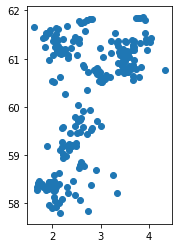

In [347]:
# Test load
df = pd.read_parquet(interim_locations/'geolink_norge_well_logs_train.parquet').set_index(['Well', 'DEPT'])

df_well_tops = gpd.read_file(interim_locations/'norge_well_tops.gpkg')
df_well_tops_minimal = df_well_tops[[
    'wlbWellboreName_geolink',
    'wlbCompletionYear',    
    'wlbKellyBushElevation',
    'wlbCompletionDate',
    'wlbTotalDepth',
    'geometry',
]]
df_well_tops.plot()

In [357]:
# Merge well tops and well logs
df_all_clean3 = pd.merge(left=df_all_clean2.head(100),
         right=df_well_tops_minimal,
         left_on='Well',
         right_on='wlbWellboreName_geolink',
         how='left').drop(columns='wlbWellboreName_geolink')
df_all_clean3.set_index(['Well', 'DEPT'])

LITHOLOGY_GEOLINK       CALI   DRHO      NPHI   RHOB  \
Well    DEPT                                                               
15_9-12 2215.917725        Shaly Silt  14.438001  0.010  0.447725  2.363   
        2216.070068        Shaly Silt  14.633000  0.006  0.432095  2.340   
        2216.222412        Shaly Silt  14.813001  0.006  0.410166  2.314   
        2216.375000        Shaly Silt  14.383001 -0.001  0.414143  2.293   
        2216.527344        Shaly Silt  14.202999  0.001  0.439923  2.275   
...                               ...        ...    ...       ...    ...   
        2230.395752          Cinerite  14.320000  0.071  0.381820  2.369   
        2230.548096          Cinerite  13.922000  0.099  0.369108  2.475   
        2230.700439          Cinerite  13.820000  0.115  0.349064  2.436   
        2230.853027              Silt  13.773000  0.132  0.314589  2.395   
        2231.005371              Silt  13.953000  0.073  0.358046  2.266   

                            GR         DTC         DTE      RDEP         SP  \
Well    DEPT                                                                  
15_9-12 2215.917725  60.285748  134.253601  40252992.0  0.737006  50.570400   
        2216.070068  63.250000  129.101868  38724252.0  0.741000  50.820000   
        2216.222412  61.405998  122.476944  36726600.0  0.752000  50.820000   
        2216.375000  62.561596  116.908607  34970676.0  0.739962  51.070000   
        2216.527344  61.691055  115.390953  34544376.0  0.715966  51.070602   
...                        ...         ...         ...       ...        ...   
        2230.395752  43.737202  114.820877  34341308.0  0.878000  53.695400   
        2230.548096  35.750000  102.544052  30616466.0  0.878008  53.943798   
        2230.700439  35.405998   98.885025  29579260.0  0.883027  53.194599   
        2230.853027  38.855068   99.962883  29830950.0  0.900026  52.945801   
        2231.005371  45.758114  105.669891  31538646.0  0.908008  53.194199   

                     ...  THOR  URAN  RMIC  CGR  TGAS  wlbCompletionYear  \
Well    DEPT         ...                                                   
15_9-12 2215.917725  ...   NaN   NaN   NaN  NaN   NaN               1982   
        2216.070068  ...   NaN   NaN   NaN  NaN   NaN               1982   
        2216.222412  ...   NaN   NaN   NaN  NaN   NaN               1982   
        2216.375000  ...   NaN   NaN   NaN  NaN   NaN               1982   
        2216.527344  ...   NaN   NaN   NaN  NaN   NaN               1982   
...                  ...   ...   ...   ...  ...   ...                ...   
        2230.395752  ...   NaN   NaN   NaN  NaN   NaN               1982   
        2230.548096  ...   NaN   NaN   NaN  NaN   NaN               1982   
        2230.700439  ...   NaN   NaN   NaN  NaN   NaN               1982   
        2230.853027  ...   NaN   NaN   NaN  NaN   NaN               1982   
        2231.005371  ...   NaN   NaN   NaN  NaN   NaN               1982   

                     wlbKellyBushElevation    wlbCompletionDate  \
Well    DEPT                                                      
15_9-12 2215.917725                   25.0  1982-02-27T00:00:00   
        2216.070068                   25.0  1982-02-27T00:00:00   
        2216.222412                   25.0  1982-02-27T00:00:00   
        2216.375000                   25.0  1982-02-27T00:00:00   
        2216.527344                   25.0  1982-02-27T00:00:00   
...                                    ...                  ...   
        2230.395752                   25.0  1982-02-27T00:00:00   
        2230.548096                   25.0  1982-02-27T00:00:00   
        2230.700439                   25.0  1982-02-27T00:00:00   
        2230.853027                   25.0  1982-02-27T00:00:00   
        2231.005371                   25.0  1982-02-27T00:00:00   

                     wlbTotalDepth                  geometry  
Well    DEPT                                                  
15_9-12 2215.917

In [356]:
df_picks = pd.read_parquet(interim_locations/'geolink_norge_picks.parquet')
df_picks

,Unnamed: 0,Well identifier,Surface,X,Y,Z,MD,Geological age,TVT,TST,Interpreter,Observation number
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.90,1382.0,4.21,NaN,NaN,NPD,1
1,21660,10/4-1,Roedby Fm. Top,628531.41,6394710.62,-1350.90,1382.0,98.90,NaN,NaN,NPD,1
2,21656,10/4-1,Sola Fm. Top,628531.47,6394710.62,-1381.90,1413.0,102.50,NaN,NaN,NPD,1
3,21664,10/4-1,Aasgard Fm. Top,628531.50,6394710.61,-1397.90,1429.0,117.00,NaN,NaN,NPD,1
4,21668,10/4-1,VESTLAND GP. Top,628531.27,6394713.59,-2242.88,2274.0,1.00,NaN,NaN,NPD,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21671,18878,9/8-1,Vaale Fm. Top,580466.31,6356474.78,-1202.50,1233.0,0.00,NaN,NaN,NPD,1
21672,18877,9/8-1,NORDLAND GP. Top,580466.31,6356474.78,-67.50,98.0,0.00,NaN,NaN,NPD,1
21673,18876,9/8-1,BOKNFJORD GP. Top,580466.31,6356474.78,-1746.50,1777.0,1.00,NaN,NaN,NPD,1
21674,18868,9/8-1,Egersund Fm. Top,580466.31,6356474.78,-1794.50,1825.0,153.80,NaN,NaN,NPD,1
